In [1]:
import cv2 #open cv 모듈 #open cv는 numpy의 자료형을 다룸
from google.colab import files #코랩에서 파일불러오기위한 모듈
from google.colab.patches import cv2_imshow #코랩에서 내놓은 cv호환패치 모듈
import numpy as np
from time import time, sleep

Saving flower.jpg to flower.jpg
(391, 400, 3)


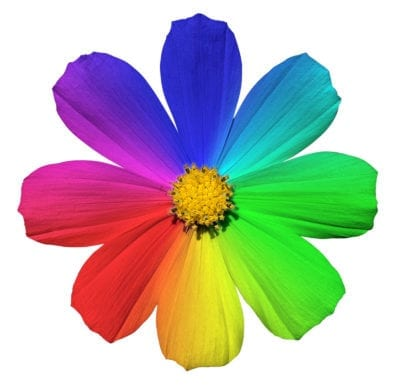

In [2]:
file1 = files.upload()
img1 = cv2.imread("flower.jpg") #"flower.jpg"는 업로드하는 이미지 파일명으로 수정 필요 #절대경로 혹은 상대경로로 가져옴
print(img1.shape) #shape로 정보 출력 (가로,세로,채널) -> 이미지가 가진 정보의 행렬의 크기를 알 수 있음
#img1[20:30][:][:] = 0 #아이템에 접근 #x 20~30 #y 전부 #z 전부
cv2_imshow(img1) ##20~30구간 값이 0이되서 검게나옴
#이미지 절반으로 줄이고, 2배로늘리기
#넘파이 np.zeros(shape,dtype,order) opencv에서 쓰는 자료타입만들기 b g r 순서로 색정보가 배열되어있음 


In [ ]:
#복사
height, width, channel = img1.shape
copy_img=np.zeros(shape=(height,width,channel), dtype=np.uint8) #channel에는 255가 넘는값이 못들어가므로 알아서 보정해야함
for x in range(height):
  for y in range(width):
    for z in range(channel):
      copy_img[x][y][z] = img1[x][y][z]

cv2_imshow(copy_img)

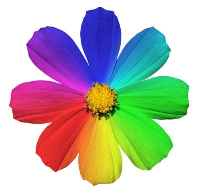

(195, 200, 3)


In [ ]:
#반토막
h_height=int(height/2)
h_width=int(width/2)
half_img=np.zeros(shape=(h_height,h_width,channel), dtype=np.uint8)

for x in range(h_height):
  for y in range(h_width):
    for z in range(channel):
      half_img[x][y][z]=img1[2*x][2*y][z]

cv2_imshow(half_img)
print(half_img.shape)

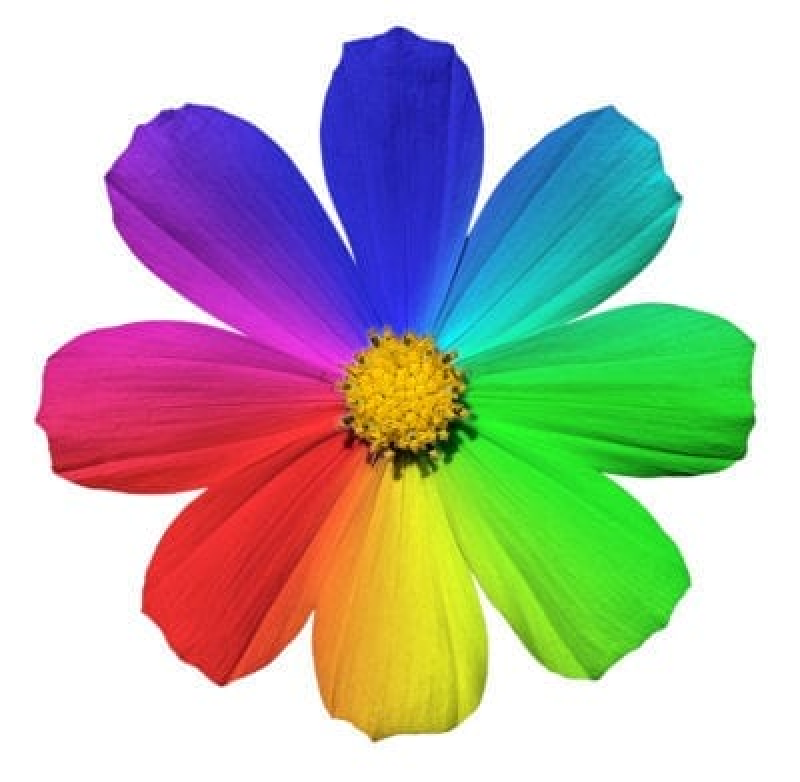

(782, 800, 3)


In [ ]:
#2배
d_height=int(height*2)
d_width=int(width*2)
double_img=np.zeros(shape=(d_height,d_width,channel), dtype=np.uint8)

for x in range(d_height):
  for y in range(d_width):
    for z in range(channel):
      double_img[x][y][z]=img1[int(x/2)][int(y/2)][z]


cv2_imshow(double_img)
print(double_img.shape)

확대/축소 배율 :4
1564 1600
time elapsed: 11.023851156234741


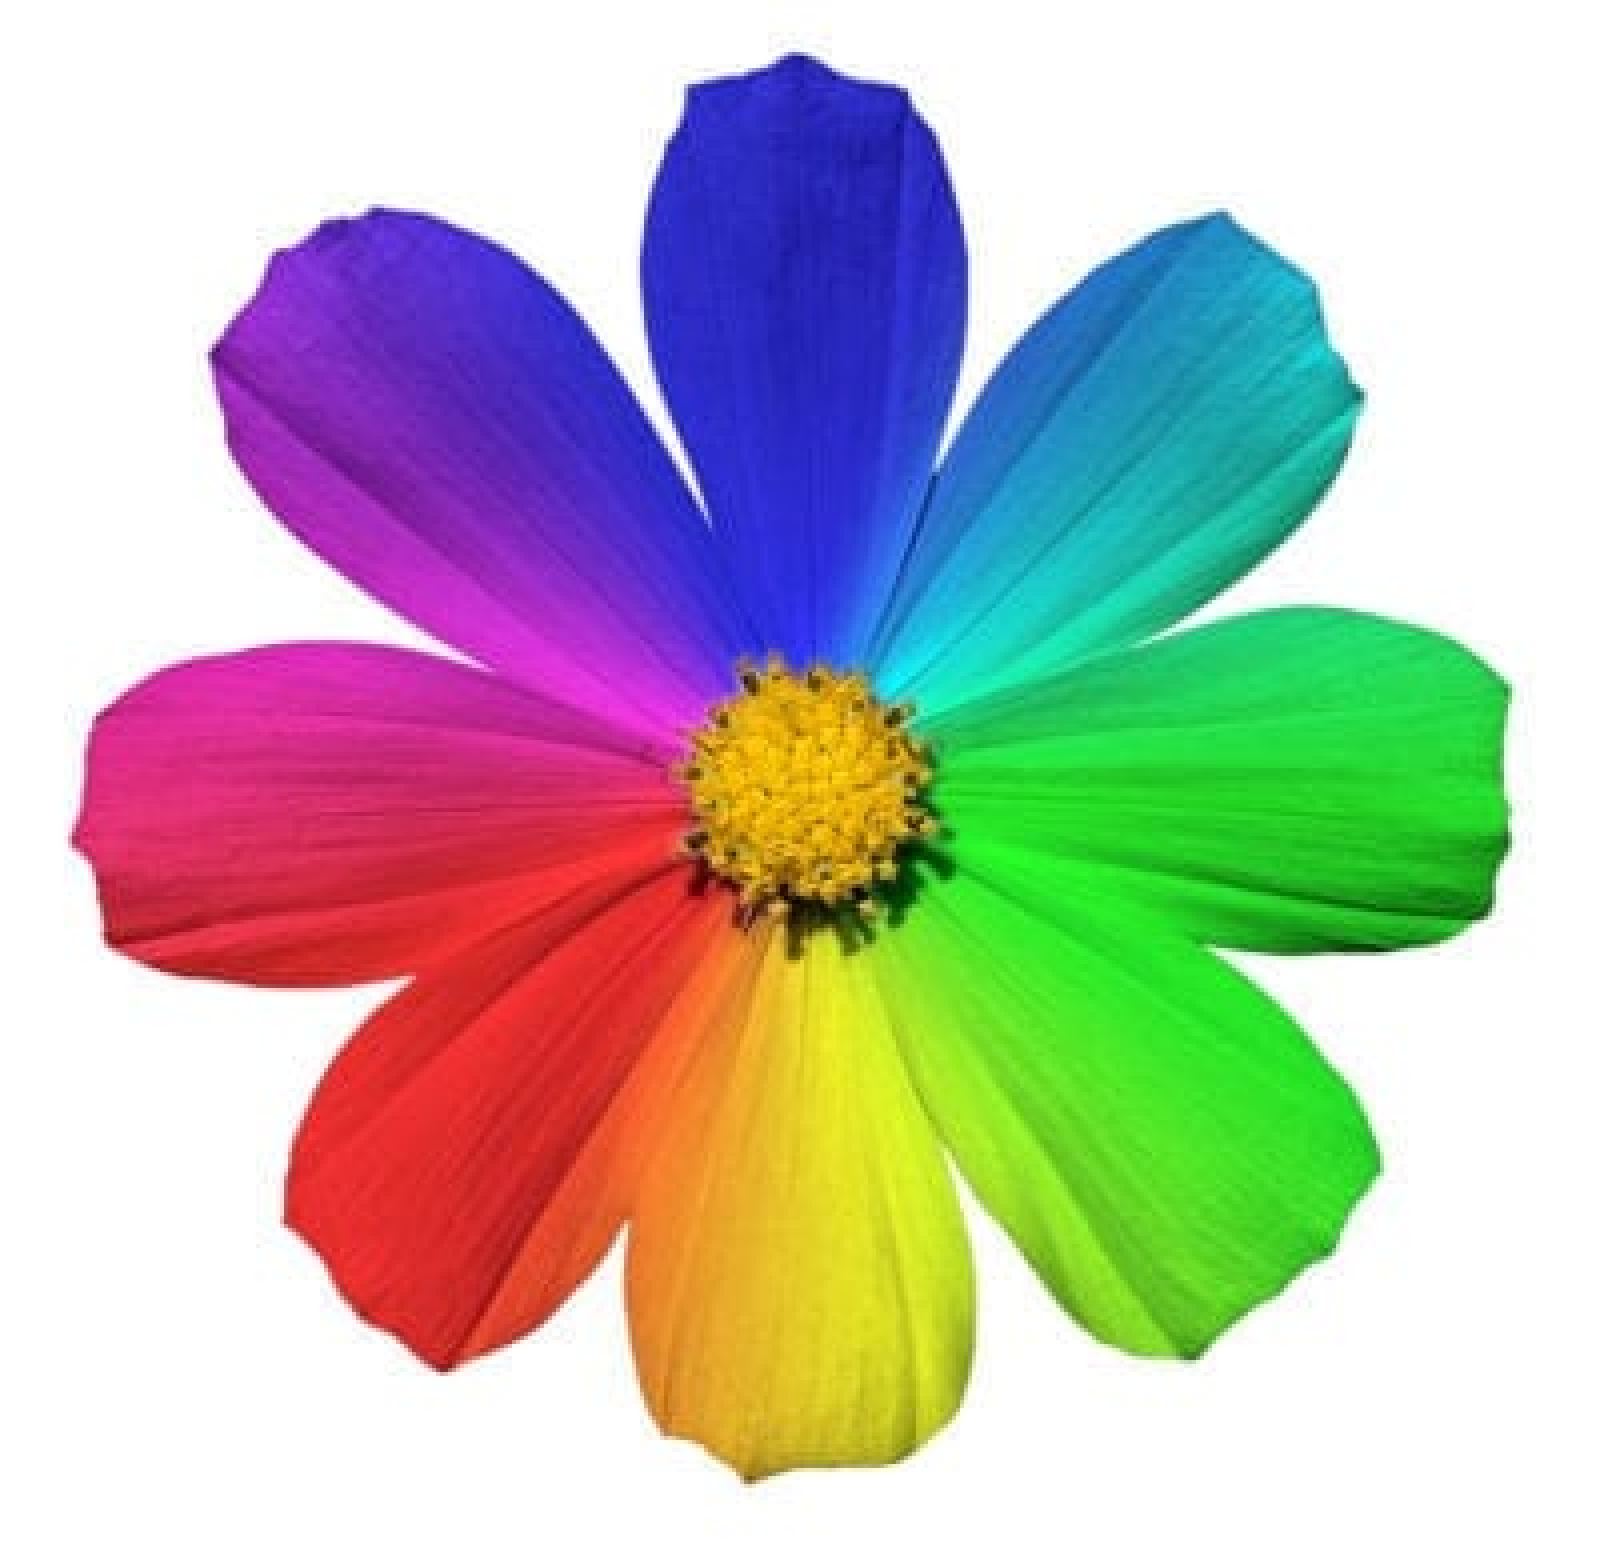

(1564, 1600, 3)


In [4]:
#n배
height, width, channel = img1.shape
n=float(input("확대/축소 배율 :"))
n_height=int(height*n)
n_width=int(width*n)
print(n_height,n_width)
n_img=np.zeros(shape=(n_height,n_width,channel), dtype=np.uint8)

start = time()

for x in range(n_height):
  for y in range(n_width):
    for z in range(channel):
      n_img[x][y][z]=img1[int(x/n)][int(y/n)][z]

end = time()

print('time elapsed:', end - start)

cv2_imshow(n_img)
print(n_img.shape)

확대/축소 배율 :4
1564 1600
time elapsed: 5.763090372085571


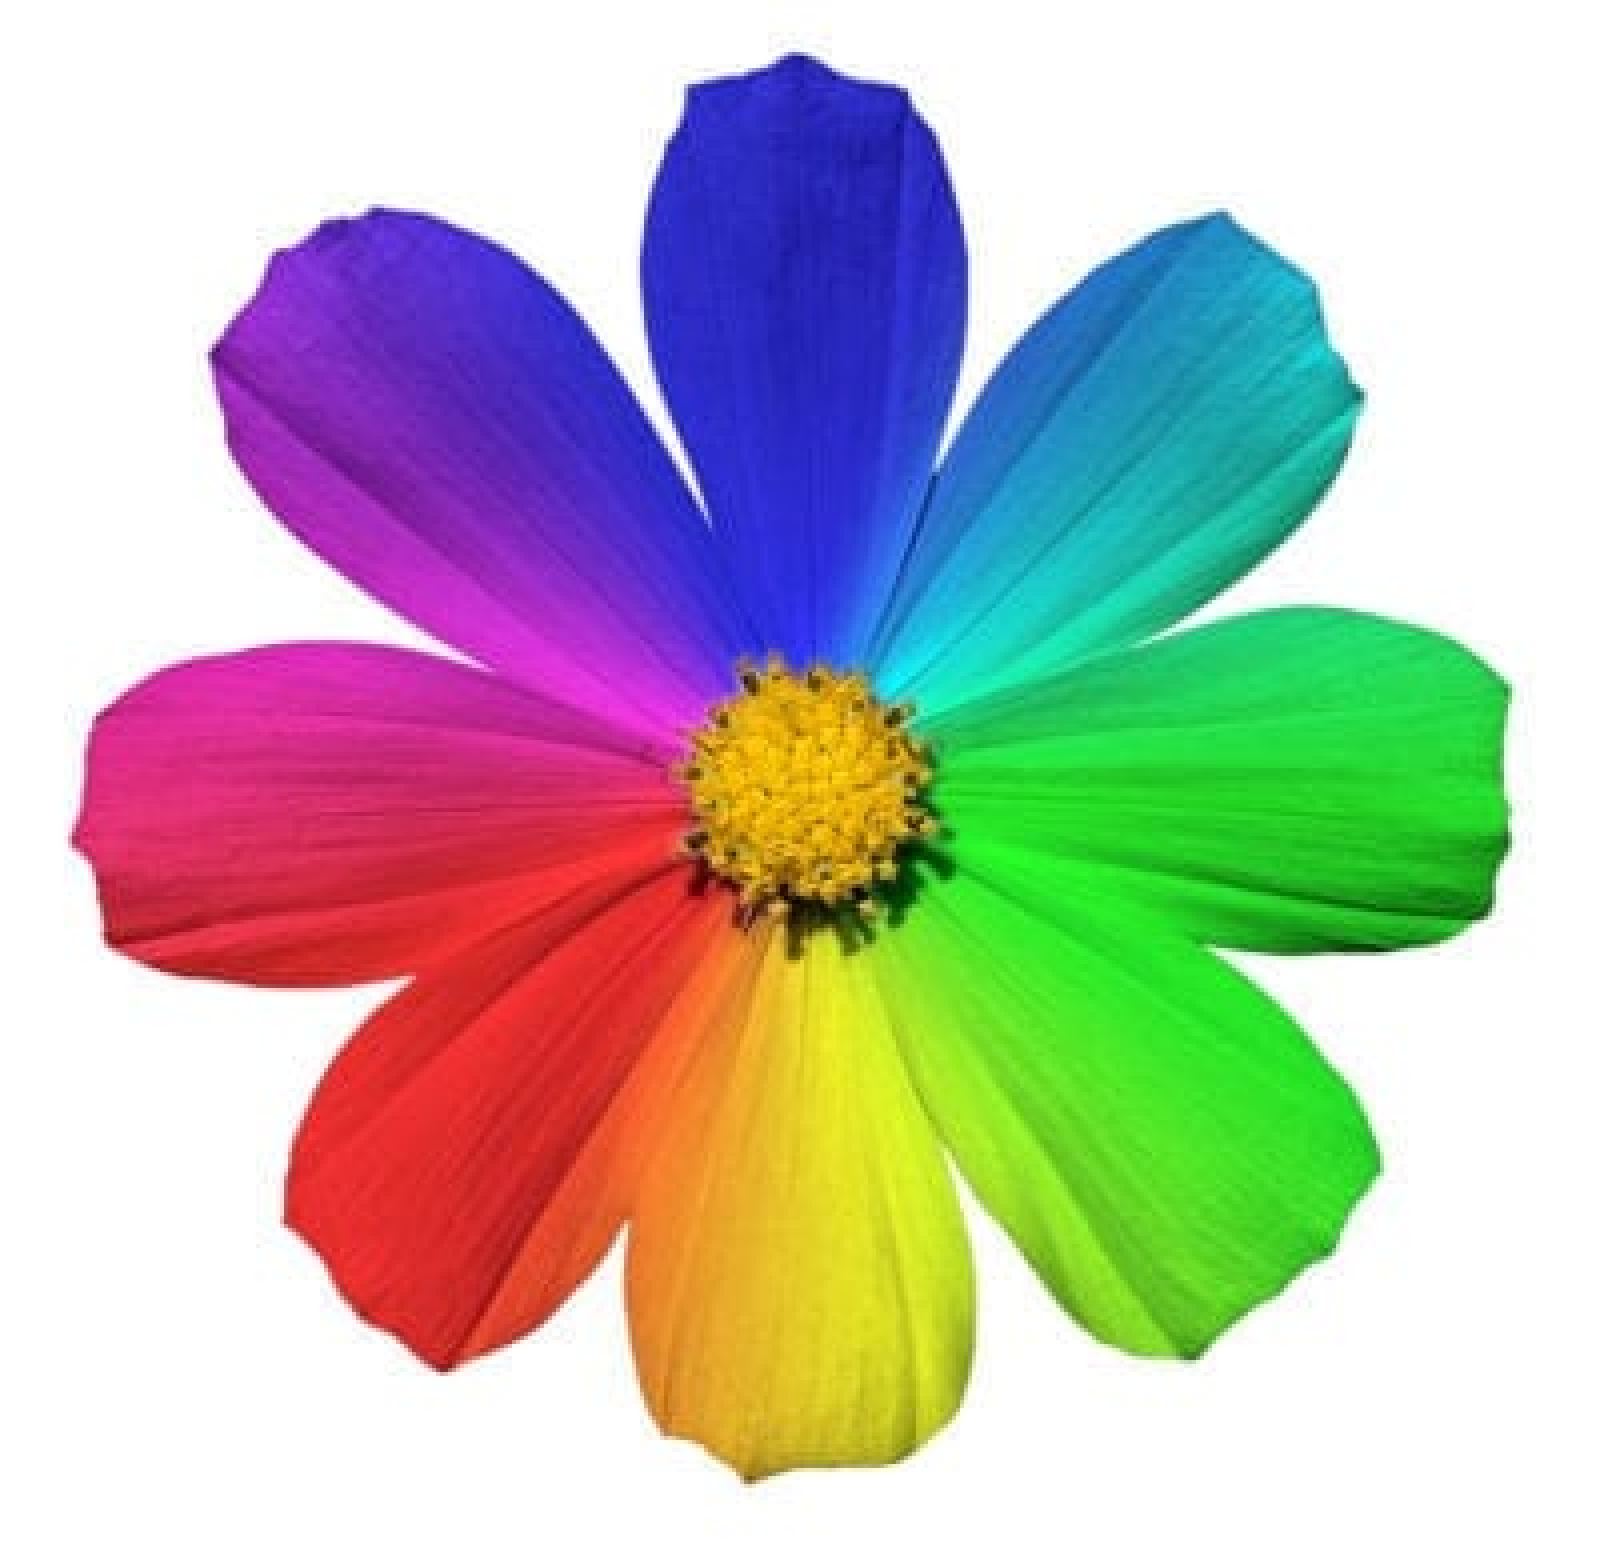

(1564, 1600, 3)


In [5]:
#n배
n=float(input("확대/축소 배율 :"))
n_height=int(height*n)
n_width=int(width*n)
print(n_height,n_width)
n_img=np.zeros(shape=(n_height,n_width,channel), dtype=np.uint8)

start = time()
#최적화, 측정시간이 상당히 줄어듬
for y in range(n_height): #세로라서 y로 지정
  n_r_data=n_img[y] #최적화 : 변수로 불러옴
  org_r_data=img1[int(y/n)] #최적화 : 변수로 불러옴
  for x in range(n_width): #가로라서 x로 지정
    n_r_data[x][0]=org_r_data[int(x/n)][0] #blue
    n_r_data[x][1]=org_r_data[int(x/n)][1] #green
    n_r_data[x][2]=org_r_data[int(x/n)][2] #red

end = time()

print('time elapsed:', end - start)

cv2_imshow(n_img)
print(n_img.shape)

391 400


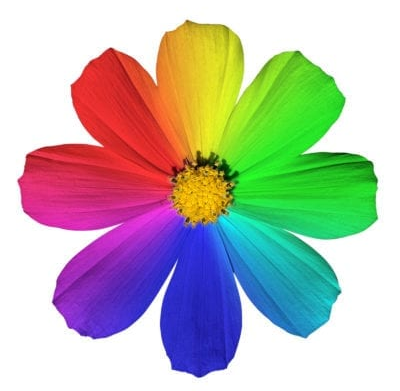

In [ ]:
#상하반전
height, width, channel = img1.shape
reverse_img=np.zeros(shape=(height,width,channel), dtype=np.uint8) #channel에는 255가 넘는값이 못들어가므로 알아서 보정해야함
print(height,width)
for y in range(height):
  r_r_data=reverse_img[height-y-1] #y대신 height-y-1써서 상하반전
  org_r_data=img1[y]
  for x in range(width):
    r_r_data[x][0] = org_r_data[x][0]
    r_r_data[x][1] = org_r_data[x][1]
    r_r_data[x][2] = org_r_data[x][2]

cv2_imshow(reverse_img)

391 400


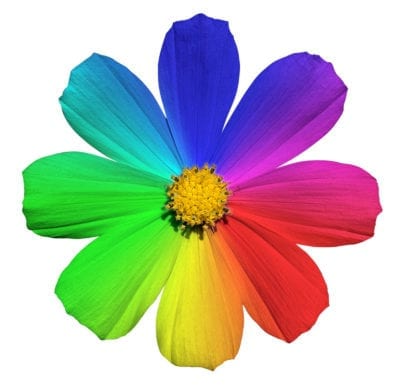

In [ ]:
#좌우반전
height, width, channel = img1.shape
reverse2_img=np.zeros(shape=(height,width,channel), dtype=np.uint8) #channel에는 255가 넘는값이 못들어가므로 알아서 보정해야함
print(height,width)
for y in range(height):
  r_r_data=reverse2_img[y] 
  org_r_data=img1[y]
  for x in range(width):
    r_r_data[width-x-1][0] = org_r_data[x][0] #x대신 width-x-1써서 좌우반전
    r_r_data[width-x-1][1] = org_r_data[x][1]
    r_r_data[width-x-1][2] = org_r_data[x][2]

cv2_imshow(reverse2_img)

391 400


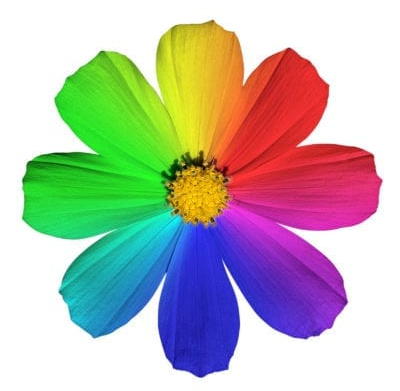

In [ ]:
#원점대칭반전
height, width, channel = img1.shape
reverse3_img=np.zeros(shape=(height,width,channel), dtype=np.uint8) #channel에는 255가 넘는값이 못들어가므로 알아서 보정해야함
print(height,width)
for y in range(height):
  r_r_data=reverse3_img[height-y-1] 
  org_r_data=img1[y]
  for x in range(width):
    r_r_data[width-x-1][0] = org_r_data[x][0] #x대신 width-x-1써서 좌우반전
    r_r_data[width-x-1][1] = org_r_data[x][1]
    r_r_data[width-x-1][2] = org_r_data[x][2]

cv2_imshow(reverse3_img)

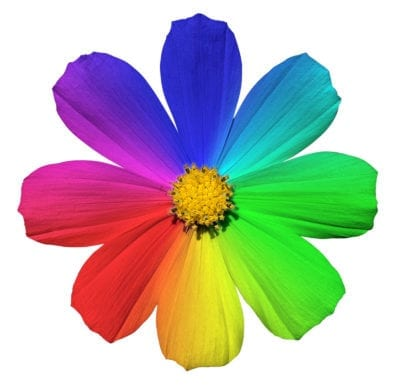

In [ ]:
cv2_imshow(img1)

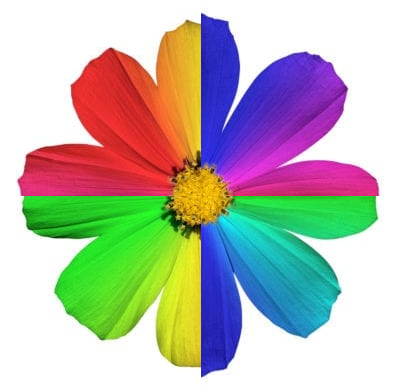

In [ ]:
#90도 회전 시도1
#가운데좌표를 원점삼으면 1사분면은 좌우, 2는 상하, 3은 좌우, 4는 상하 -> 모자이크 원리?
height, width, channel = img1.shape
rotate90_img=np.zeros(shape=(height,width,channel), dtype=np.uint8) #channel에는 255가 넘는값이 못들어가므로 알아서 보정해야함
for y in range(height):
  for x in range(width):
    for z in range(channel):
      if y>=height/2 and x<=width/2:
        rotate90_img[y][x][z]=img1[y][width-x-1][z]
      elif y>=height/2 and x>width/2:
        rotate90_img[y][x][z]=img1[height-y-1][x][z]
      elif y<height/2 and x>width/2:
        rotate90_img[y][x][z]=img1[y][width-x-1][z]
      elif y<height/2 and x<=width/2:
        rotate90_img[y][x][z]=img1[height-y-1][x][z]

cv2_imshow(rotate90_img)

391
400
400
391


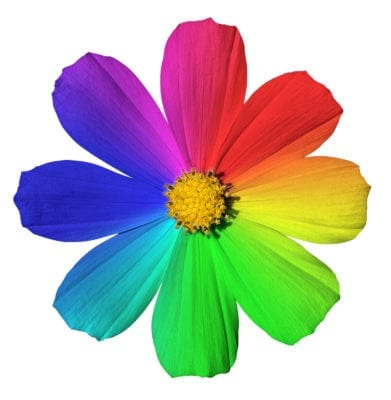

In [ ]:
#90도회전 시도2 ->180도 회전방법임
#x,y축의 값을 뒤바꿈
height, width, channel = img1.shape
print(height)
print(width)
r9_height=width
r9_width=height
print(r9_height)
print(r9_width)
rotate90_2_img=np.zeros(shape=(r9_height,r9_width,channel), dtype=np.uint8) #channel에는 255가 넘는값이 못들어가므로 알아서 보정해야함
for y in range(r9_height): #r9_height=width=400
  for x in range(r9_width): #r9_width=height=391
    for z in range(channel):
        rotate90_2_img[y][x][z]=img1[x][y][z]


cv2_imshow(rotate90_2_img)

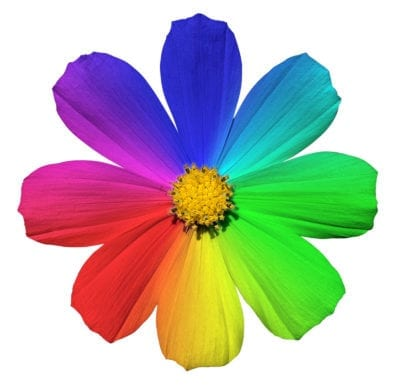

In [ ]:
cv2_imshow(img1)

391
400
400
391


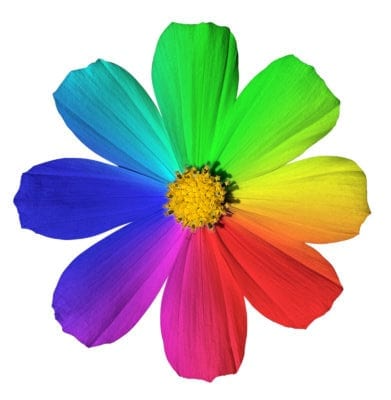

In [ ]:
#90도회전 시도3 ->270도 회전방법임
#x,y축의 값을 뒤바꾸고 y축만 역순 
height, width, channel = img1.shape
print(height)
print(width)
r9_height=width
r9_width=height
print(r9_height)
print(r9_width)
rotate90_3_img=np.zeros(shape=(r9_height,r9_width,channel), dtype=np.uint8) #channel에는 255가 넘는값이 못들어가므로 알아서 보정해야함
for y in range(r9_height): #r9_height=width=400
  for x in range(r9_width): #r9_width=height=391
    for z in range(channel):
      rotate90_3_img[y][x][z]=img1[x][r9_height-y-1][z] #길이를 인덱스에 넣으려면 -1로 보정해줘야함


cv2_imshow(rotate90_3_img)

391
400
400
391


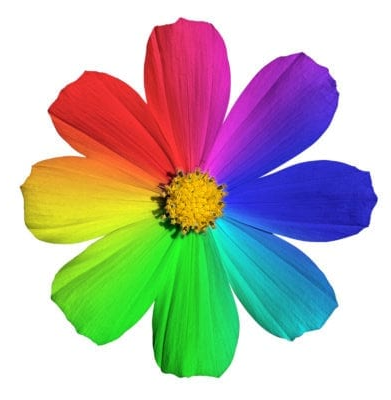

In [ ]:
#90도회전 시도4 ->90도 회전 성공
#x,y축의 값을 뒤바꾸고 x축만 역순 
height, width, channel = img1.shape
print(height)
print(width)
r9_height=width
r9_width=height
print(r9_height)
print(r9_width)
rotate90_4_img=np.zeros(shape=(r9_height,r9_width,channel), dtype=np.uint8) #channel에는 255가 넘는값이 못들어가므로 알아서 보정해야함
for y in range(r9_height): #r9_height=width=400
  for x in range(r9_width): #r9_width=height=391
    for z in range(channel):
      rotate90_4_img[y][x][z]=img1[r9_width-x-1][y][z]


cv2_imshow(rotate90_4_img)

391
400
400
391


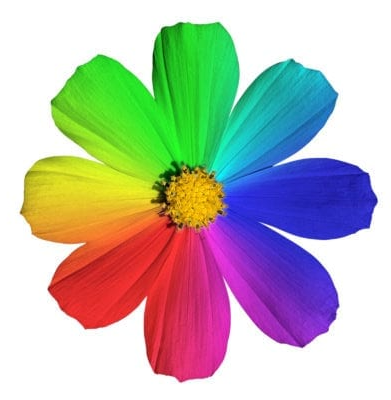

In [ ]:
#90도회전 시도5 ->시계방향으로 270도 돌리고 z축 한바퀴 돌림?
#xy축 뒤바꾸고 x,y축 둘다 역순
height, width, channel = img1.shape
print(height)
print(width)
r9_height=width
r9_width=height
print(r9_height)
print(r9_width)
rotate90_5_img=np.zeros(shape=(r9_height,r9_width,channel), dtype=np.uint8) #channel에는 255가 넘는값이 못들어가므로 알아서 보정해야함
for y in range(r9_height): #r9_height=width=400
  for x in range(r9_width): #r9_width=height=391
    for z in range(channel):
      rotate90_5_img[y][x][z]=img1[r9_width-x-1][r9_height-y-1][z]


cv2_imshow(rotate90_5_img)

*   Python:
*   cv.resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]]	) ->	dst
이코드로 리사이즈 쉽게 가능